Exercise Sheet 5  **Independent Component Analysis: Infomax**  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write

**5.1: Initialization**

In [2]:
# parameters
p = 18000 # samples
sr = 8192 # sampling rate

# (a)
# loading the data
sound1 = np.loadtxt('sound1.dat', float)
sound1 = sound1.reshape((1, len(sound1)))
sound2 = np.loadtxt('sound2.dat', float)
sound2 = sound2.reshape((1, len(sound2)))

# (b)
# mixing
# a_mat = np.random.uniform(high=0, low=1, size=(2, 2)) # random
a_mat = np.array([[1, 1], [1, 2]])
s_mat = np.concatenate((sound1, sound2), axis=0)
x_mat_org = np.matmul(a_mat, s_mat)
write('sound1_mixed.wav', 8192, x_mat_org[0])
write('sound2_mixed.wav', 8192, x_mat_org[1])

# (c)
# permutation
x_mat = np.random.permutation(x_mat_org.T).T

# (d)
# correlations
print("using off-the-shelf numpy's implementation and given equation:")
for i in range(2):
    for j in range(2):
        cor_np = np.corrcoef(s_mat[i], x_mat_org[j])
        cor_eq = np.cov(s_mat[i], x_mat_org[j])/(np.std(s_mat[i])*np.std(x_mat_org[j]))
        print('for s%d and x%d\n'
              '\t%s\n'
              '\t%s\n' % (i+1, j+1, cor_np[0,1], cor_np[0,1]))

# (e)
# centering
x_mat = x_mat - np.mean(x_mat, axis=1).reshape(2,1)
x_mat_org = x_mat_org - np.mean(x_mat_org, axis=1).reshape(2,1)

# (f)
# random unmixing matrix
w_mat = np.random.uniform(high=-1, low=1, size=(2, 2))


using off-the-shelf numpy's implementation and given equation:
for s1 and x1
	0.7074432756789816
	0.7074432756789816

for s1 and x2
	0.4480047551989583
	0.4480047551989583

for s2 and x1
	0.707661224056477
	0.707661224056477

for s2 and x2
	0.8945951270225541
	0.8945951270225541



due to the mixing, the correlation differs from 1 or -1.

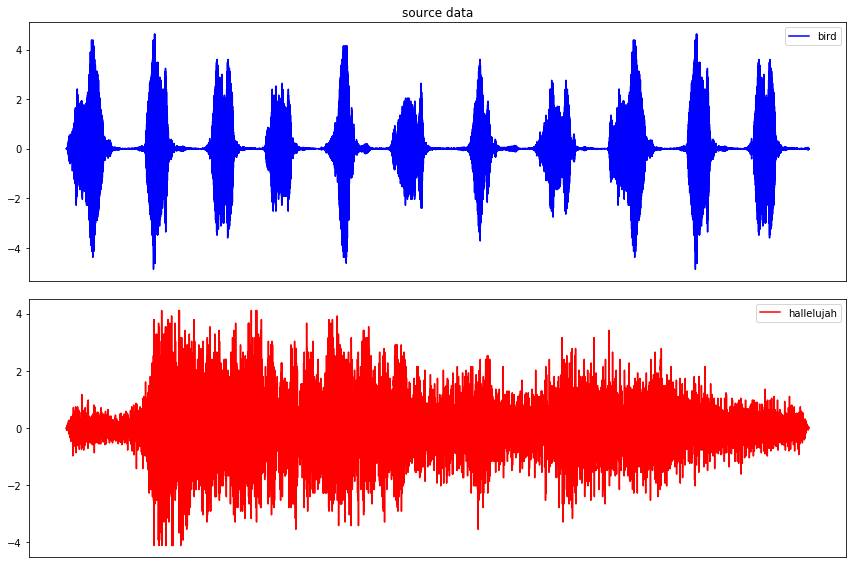

In [3]:
# some plotting
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(s_mat[0], 'b', label='bird')
plt.title('source data')
plt.xticks([])
plt.legend()
plt.subplot(2,1,2)
plt.plot(s_mat[1], 'r', label='hallelujah')
plt.legend()
plt.xticks([])
plt.tight_layout()
plt.show()

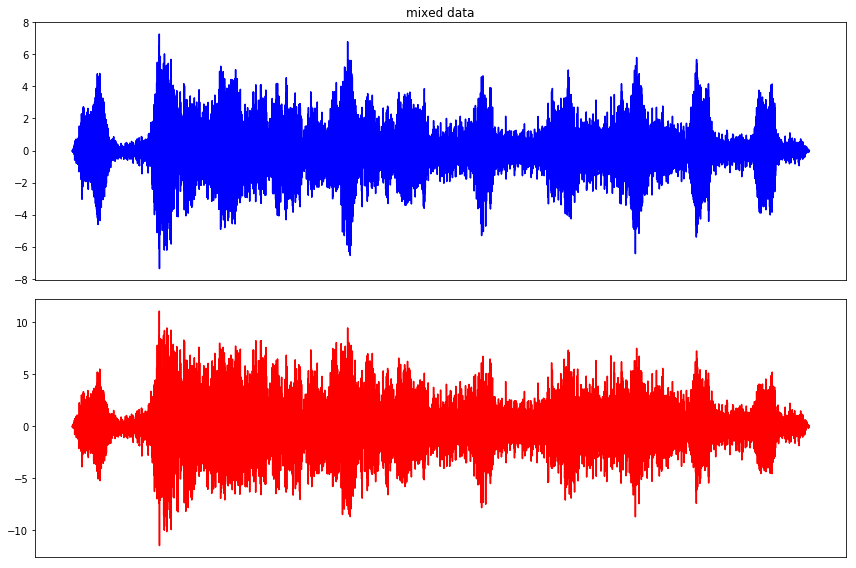

In [4]:
# some plotting
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(x_mat_org[0], 'b')
plt.title('mixed data')
plt.xticks([])
plt.subplot(2,1,2)
plt.plot(x_mat_org[1], 'r')
plt.xticks([])
plt.tight_layout()
plt.show()


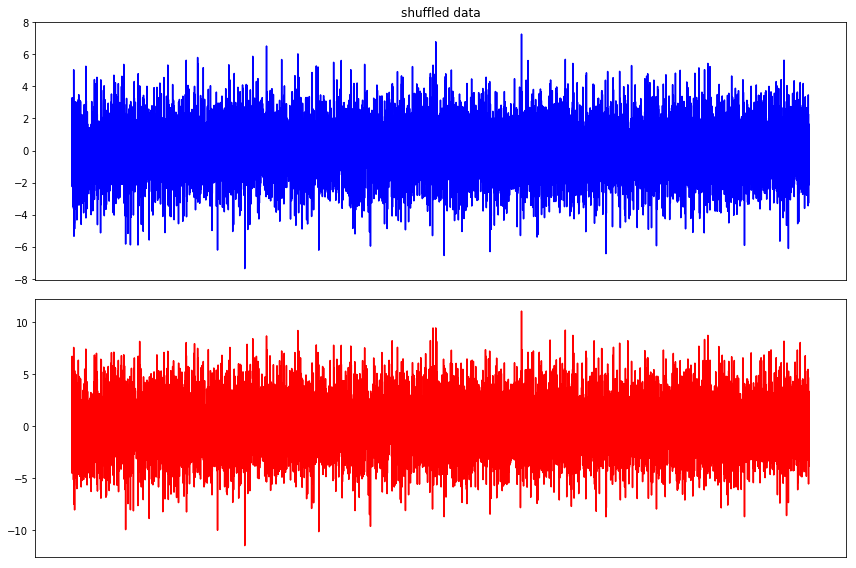

In [5]:
# some plotting
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(x_mat[0], 'b')
plt.title('shuffled data')
plt.xticks([])
plt.subplot(2,1,2)
plt.plot(x_mat[1], 'r')
plt.xticks([])
plt.tight_layout()
plt.show()


**5.2: Optimization**

In [6]:
def f_hat(x):
    return 1/(1 + np.exp(-x))


(a) standard gradient

In [7]:
# standard gradient
it_max = p*10 # max iteration
it = 0 # iteration
w_ = np.copy(w_mat)
eps = 0.01 # learning rate
tol = 1e-9 # breaking tolerance
set_w = []
set_dw = []
while it < it_max:
    set_w.append([])
    set_dw.append([])
    w_r = np.linalg.inv(w_.T)
    tol_i = 0
    for i in range(2):
        phi_i = 1-2*f_hat(np.matmul(w_[i], x_mat[:, it%p]))
        for j in range(2):
            de_dw_ij = w_r[i, j] + phi_i * x_mat[j, it%p]
            w_[i, j] = w_[i, j] + eps * de_dw_ij
            set_w[-1].append(w_[i,j])
            set_dw[-1].append(eps * de_dw_ij)
            if de_dw_ij < tol:
                tol_i += 1
    if tol_i == 4 and it >= p:
        print('tolerance satisfied after %d iterations!' % it)
        break
    it += 1
    eps = 0.9999*eps # learning rate decay
else:
    print('could not converge after %d iterations!' % it)
print(w_)

# recovering sources
u_mat = np.matmul(w_, x_mat_org)


tolerance satisfied after 18002 iterations!
[[ 3.11243126 -1.28633057]
 [-3.05501962  2.42488721]]


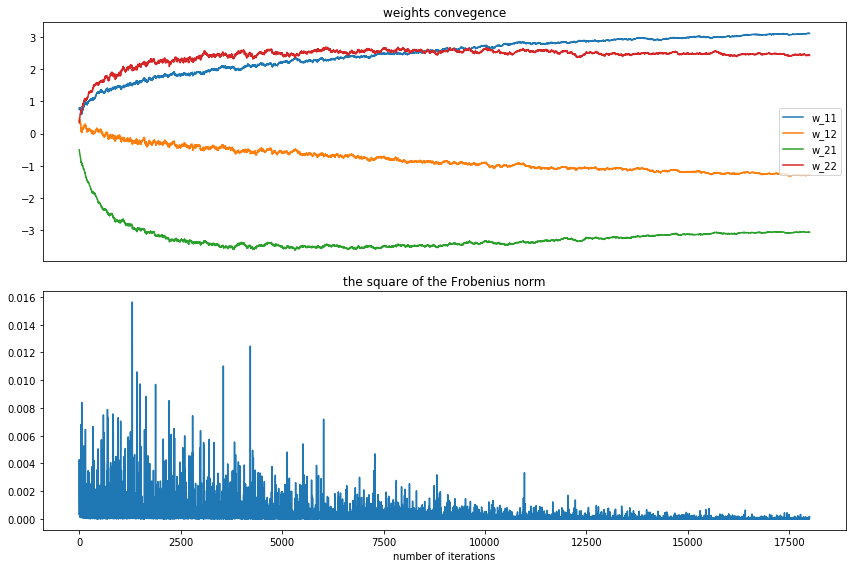

In [8]:
# plotting
array_w = np.array(set_w)
array_dw = np.array(set_dw)
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(array_w)
plt.xticks([])
plt.title('weights convegence')
plt.legend(['w_11', 'w_12', 'w_21', 'w_22'])
plt.subplot(2,1,2)
w_frobenius = np.sum(array_dw**2, axis=1)
plt.plot(w_frobenius)
plt.title('the square of the Frobenius norm')
plt.xlabel('number of iterations')
plt.tight_layout()
plt.show()


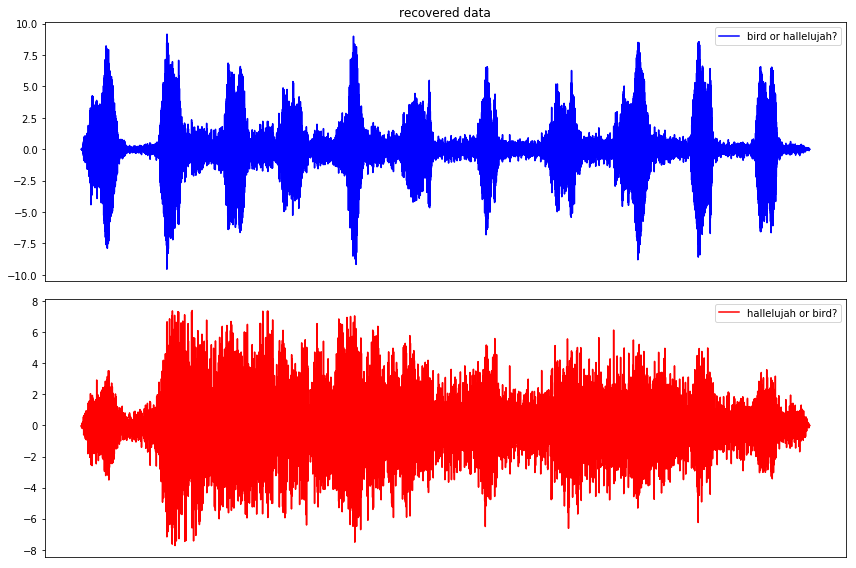

In [9]:
# plotting
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(u_mat[0], 'b', label='bird or hallelujah?')
plt.title('recovered data')
plt.xticks([])
plt.legend()
plt.subplot(2,1,2)
plt.plot(u_mat[1], 'r', label='hallelujah or bird?')
plt.legend()
plt.xticks([])
plt.tight_layout()
plt.show()


In [10]:
# exporting the recovered data
write('sound1_unmixed_standard.wav', 8192, u_mat[0])
write('sound2_unmixed_standard.wav', 8192, u_mat[1])

# correlations
print("using off-the-shelf numpy's implementation and given equation:")
for i in range(2):
    for j in range(2):
        cor_np = np.corrcoef(s_mat[i], u_mat[j])
        cor_eq = np.cov(s_mat[i], u_mat[j])/(np.std(s_mat[i])*np.std(u_mat[j]))
        print('for s%d and u%d\n'
              '\t%s\n'
              '\t%s\n' % (i+1, j+1, cor_np[0,1], cor_np[0,1]))


using off-the-shelf numpy's implementation and given equation:
for s1 and u1
	0.9589883766699253
	0.9589883766699253

for s1 and u2
	-0.3301217949732624
	-0.3301217949732624

for s2 and u1
	0.2846538779383286
	0.2846538779383286

for s2 and u2
	0.9435215116095431
	0.9435215116095431



In [11]:
# whitening
C = np.matmul(x_mat, x_mat.T)/p # covariance matrice
A, V = np.linalg.eig(C) # A: Eigenvalues     V: Eigenvectors
x_mat_w = np.matmul(V.T, x_mat) # decorrelation
x_mat_w = (np.sqrt(1/A).reshape(2,1)*x_mat_w) # whitening

C = np.matmul(x_mat_org, x_mat_org.T)/p # covariance matrice
A, V = np.linalg.eig(C) # A: Eigenvalues     V: Eigenvectors
x_mat_org_w = np.matmul(V.T, x_mat_org) # decorrelation
x_mat_org_w = (np.sqrt(1/A).reshape(2,1)*x_mat_org_w) # whitening


In [12]:
# (a) Element-wise
# standard gradient
it_max = 10*p # max iteration
it = 0 # iteration
w_w = np.copy(w_mat)
eps = 0.01 # learning rate
tol = 1e-9 # breaking tolerance
set_w_w = []
set_dw_w = []
while it < it_max:
    set_w_w.append([])
    set_dw_w.append([])
    w_r = np.linalg.inv(w_w.T)
    tol_i = 0
    for i in range(2):
        phi_i = 1-2*f_hat(np.matmul(w_w[i], x_mat_w[:, it%p]))
        for j in range(2):
            de_dw_ij = w_r[i, j] + phi_i * x_mat_w[j, it%p]
            w_w[i, j] = w_w[i, j] + eps * de_dw_ij
            set_w_w[-1].append(w_w[i,j])
            set_dw_w[-1].append(eps * de_dw_ij)
            if de_dw_ij < tol:
                tol_i += 1
    if tol_i == 4 and it >= p:
        print('tolerance satisfied after %d iterations!' % it)
        break
    it += 1
    eps = 0.9999*eps # learning rate decay
else:
    print('could not converge after %d iterations!' % it)
print(w_w)

# recovering sources
u_mat_w = np.matmul(w_w, x_mat_org_w)


tolerance satisfied after 18020 iterations!
[[ 1.86951545  1.14302409]
 [-0.98995546  1.590381  ]]


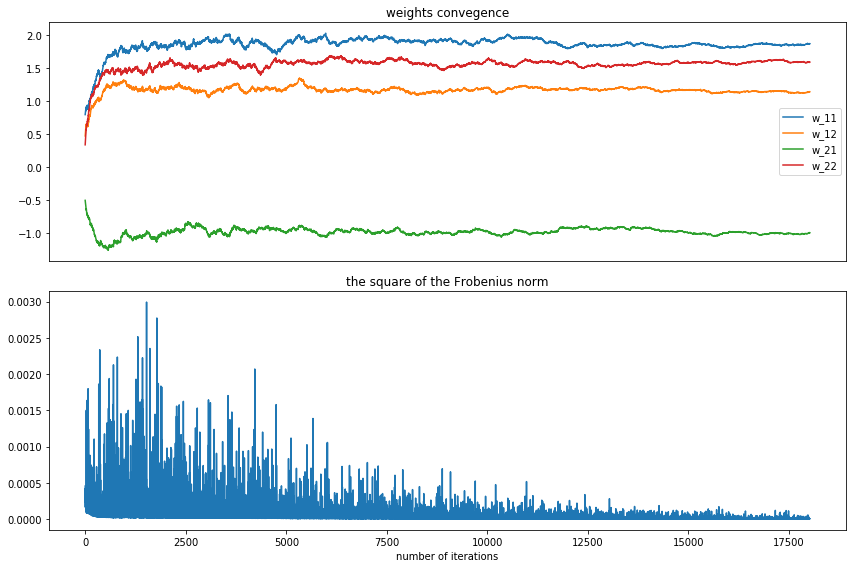

In [13]:
# plotting
array_w_w = np.array(set_w_w)
array_dw_w = np.array(set_dw_w)
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(array_w_w)
plt.xticks([])
plt.title('weights convegence')
plt.legend(['w_11', 'w_12', 'w_21', 'w_22'])
plt.subplot(2,1,2)
w_frobenius_w = np.sum(array_dw_w**2, axis=1)
plt.plot(w_frobenius_w)
plt.title('the square of the Frobenius norm')
plt.xlabel('number of iterations')
plt.tight_layout()
plt.show()



**5.3: Results**

(c) considering the scale of the square of the Forbenius norm (indicating the "convergence"), it is visible that the algorithm using the white data is quicker. Hence, in practice it is recommended to whiten the data, although not necessary.

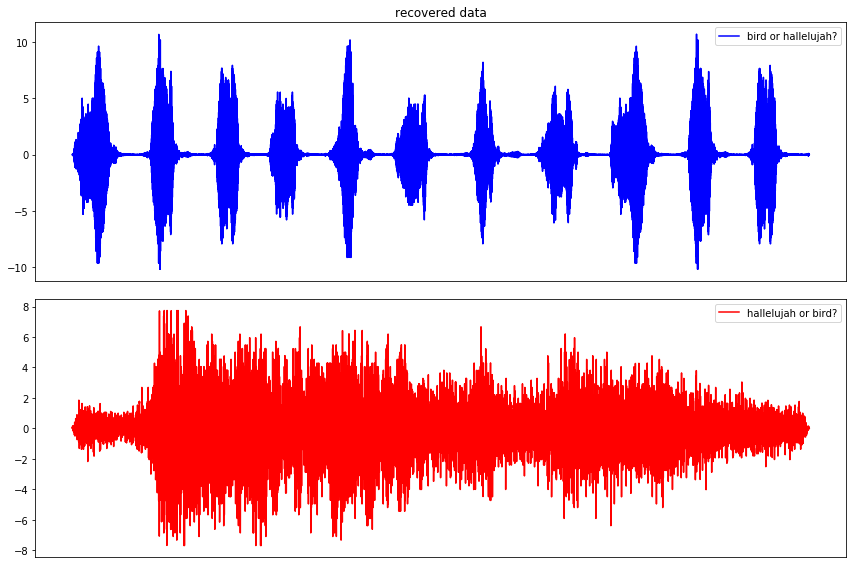

In [14]:
# plotting
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(u_mat_w[0], 'b', label='bird or hallelujah?')
plt.title('recovered data')
plt.xticks([])
plt.legend()
plt.subplot(2,1,2)
plt.plot(u_mat_w[1], 'r', label='hallelujah or bird?')
plt.legend()
plt.xticks([])
plt.tight_layout()
plt.show()


In [15]:
# exporting the recovered data
write('sound1_unmixed_standard_white.wav', 8192, u_mat_w[0])
write('sound2_unmixed_standard_white.wav', 8192, u_mat_w[1])

# correlations
print("using off-the-shelf numpy's implementation and given equation:")
for i in range(2):
    for j in range(2):
        cor_np = np.corrcoef(s_mat[i], u_mat_w[j])
        cor_eq = np.cov(s_mat[i], u_mat_w[j])/(np.std(s_mat[i])*np.std(u_mat_w[j]))
        print('for s%d and u%d\n'
              '\t%s\n'
              '\t%s\n' % (i+1, j+1, cor_np[0,1], cor_np[0,1]))


using off-the-shelf numpy's implementation and given equation:
for s1 and u1
	-0.999984354158441
	-0.999984354158441

for s1 and u2
	0.0024193111404796244
	0.0024193111404796244

for s2 and u1
	0.004333493952648677
	0.004333493952648677

for s2 and u2
	-0.999993229873948
	-0.999993229873948



the correlation for the unmixed data and original data (of the same source) is very close to 1 or -1 which means the unmixing has been successful.

(b)

In [16]:
# natural gradient
it_max = p*10 # max iteration
it = 0 # iteration
w_n = np.copy(w_mat)
eps = 0.01 # learning rate
tol = 1e-9 # breaking tolerance
set_w_n = []
set_dw_n = []
d = np.eye(2)
while it < it_max:
    set_w_n.append([])
    set_dw_n.append([])
    tol_i = 0
    for i in range(2):
        phi_i = 1-2*f_hat(np.matmul(w_n[i], x_mat[:, it%p]))
        for j in range(2):
            de_dw_ij = 0
            for l in range(2):
                de_dw_ij += (d[i, l] + phi_i * np.matmul(w_n[l], x_mat[:, it%p])) * w_n[l, j]
            w_n[i, j] = w_n[i, j] + eps * de_dw_ij
            set_w_n[-1].append(w_n[i,j])
            set_dw_n[-1].append(eps * de_dw_ij)
            if de_dw_ij < tol:
                tol_i += 1
    if tol_i == 4 and it >= p:
        print('tolerance satisfied after %d iterations!' % it)
        break
    it += 1
    eps = 0.9999*eps # learning rate decay
else:
    print('could not converge after %d iterations!' % it)
print(w_n)

# recovering sources
u_mat_n = np.matmul(w_n, x_mat_org)


tolerance satisfied after 24024 iterations!
[[ 4.52129621 -2.30395451]
 [-1.81204396  1.85366344]]


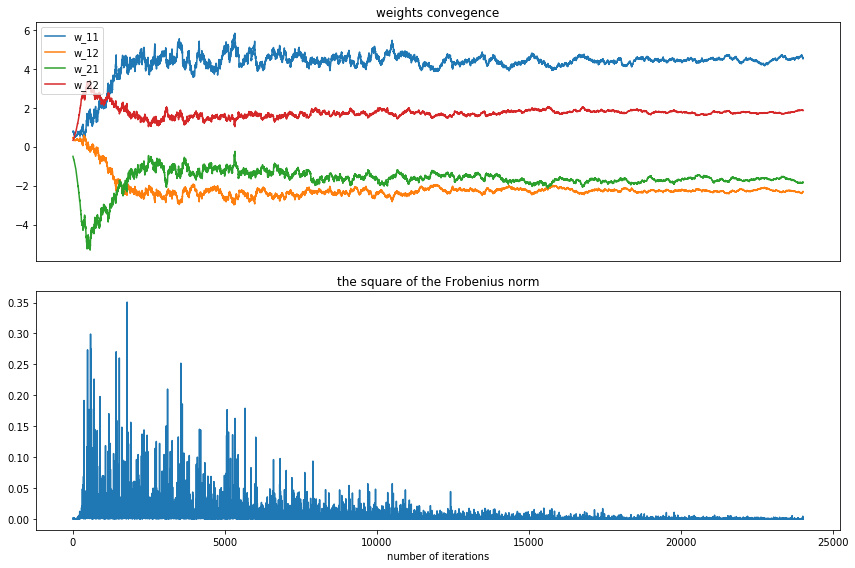

In [17]:
# plotting
array_w_n = np.array(set_w_n)
array_dw_n = np.array(set_dw_n)
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(array_w_n)
plt.xticks([])
plt.title('weights convegence')
plt.legend(['w_11', 'w_12', 'w_21', 'w_22'])
plt.subplot(2,1,2)
w_frobenius_n = np.sum(array_dw_n**2, axis=1)
plt.plot(w_frobenius_n)
plt.title('the square of the Frobenius norm')
plt.xlabel('number of iterations')
plt.tight_layout()
plt.show()


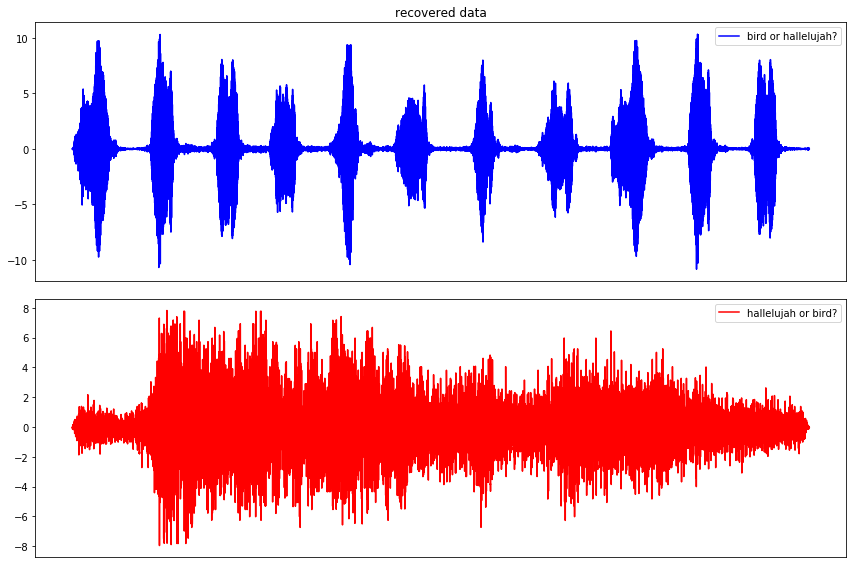

In [18]:
# plotting
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(u_mat_n[0], 'b', label='bird or hallelujah?')
plt.title('recovered data')
plt.xticks([])
plt.legend()
plt.subplot(2,1,2)
plt.plot(u_mat_n[1], 'r', label='hallelujah or bird?')
plt.legend()
plt.xticks([])
plt.tight_layout()
plt.show()


In [19]:
# exporting the recovered data
write('sound1_unmixed_natural.wav', 8192, u_mat_n[0])
write('sound2_unmixed_natural.wav', 8192, u_mat_n[1])

# correlations
print("using off-the-shelf numpy's implementation and given equation:")
for i in range(2):
    for j in range(2):
        cor_np = np.corrcoef(s_mat[i], u_mat_n[j])
        cor_eq = np.cov(s_mat[i], u_mat_n[j])/(np.std(s_mat[i])*np.std(u_mat_n[j]))
        print('for s%d and u%d\n'
              '\t%s\n'
              '\t%s\n' % (i+1, j+1, cor_np[0,1], cor_np[0,1]))


using off-the-shelf numpy's implementation and given equation:
for s1 and u1
	0.9992374256017237
	0.9992374256017237

for s1 and u2
	0.02320688656104961
	0.02320688656104961

for s2 and u1
	-0.03778624126965763
	-0.03778624126965763

for s2 and u2
	0.9997591397327602
	0.9997591397327602



once again, the correlation for the unmixed data and original data (of the same source) is very close to 1 or -1 which means the unmixing has been successful.